### Introduction 

##### The dataset under analysis comprises individual health records and associated risk factors for cardiovascular diseases. Each row represents a specific individual, and the columns include demographic informa on, lifestyle choices, medical history, and various health metrics. The primary objec ve is to analyze these factors to predict the risk of developing cardiovascular diseases in the next ten years, as indicated by the 'TenYearCHD' column.

* male: Gender (1 for male, 0 for female)
* age: Age of the individual
* education: Education level (1: Some High School, 2: High School, 3: Some College, 4: College)
* currentSmoker: Whether the individual is a current smoker (1 for yes, 0 for no)
* cigsPerDay: Number of cigarettes smoked per day (if the individual is a smoker)
* BPMeds: Whether the individual is on blood pressure medications (1 for yes, 0 for no)
* prevalentStroke: Whether the individual has had a prevalent stroke (1 for yes, 0 for no)
* prevalentHyp: Whether the individual has prevalent hypertension (1 for yes, 0 for no)
* diabetes: Whether the individual has diabetes (1 for yes, 0 for no)
* totChol: Total cholesterol level
* sysBP: Systolic blood pressure
* diaBP: Diastolic blood pressure
* BMI: Body Mass Index
* eartRate: Heart rate
* cose: Glucose level
* TenYearCHD: Whether the individual developed coronary heart disease within the next ten years (1 for yes, 0 for no)

### Importing necessary libraries #

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Feature Engineering

### Loading the dataset

In [2]:
df= pd.read_csv("framingham.csv")

### Displaying the first few rows of the dataset

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Displaying information about the dataset

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.describe(include='all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.shape

(4238, 16)

### Renaming the 'male' column to 'Gender'

In [7]:
df.rename(columns={'male': 'Gender'}, inplace=True)

### Displaying the columns in the dataset

In [8]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Checking for missing values and calculating their percentage

In [9]:
df.isna().sum()/len(df)*100

Gender             0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

### separate the numerical and categorical columns

In [10]:
numerical_cols = ['education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [11]:
categorical_cols = ['Gender', 'BPMeds', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes']

### Handling missing values 

In [12]:
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [13]:
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)

In [14]:
df.isna().sum()/len(df)*100

Gender             0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

### Displaying unique values in categorical columns

In [15]:
for col in categorical_cols:
    print(col)
    print('----------------')
    print(df[col].value_counts())
    print(' ')

Gender
----------------
0    2419
1    1819
Name: Gender, dtype: int64
 
BPMeds
----------------
0.0    4114
1.0     124
Name: BPMeds, dtype: int64
 
currentSmoker
----------------
0    2144
1    2094
Name: currentSmoker, dtype: int64
 
prevalentStroke
----------------
0    4213
1      25
Name: prevalentStroke, dtype: int64
 
prevalentHyp
----------------
0    2922
1    1316
Name: prevalentHyp, dtype: int64
 
diabetes
----------------
0    4129
1     109
Name: diabetes, dtype: int64
 


### Visualizing counts for categorical columns

In [16]:
len(categorical_cols)

6

#  Exploratory Data Analysis (EDA)

### Plotting Categorical Count Distribution

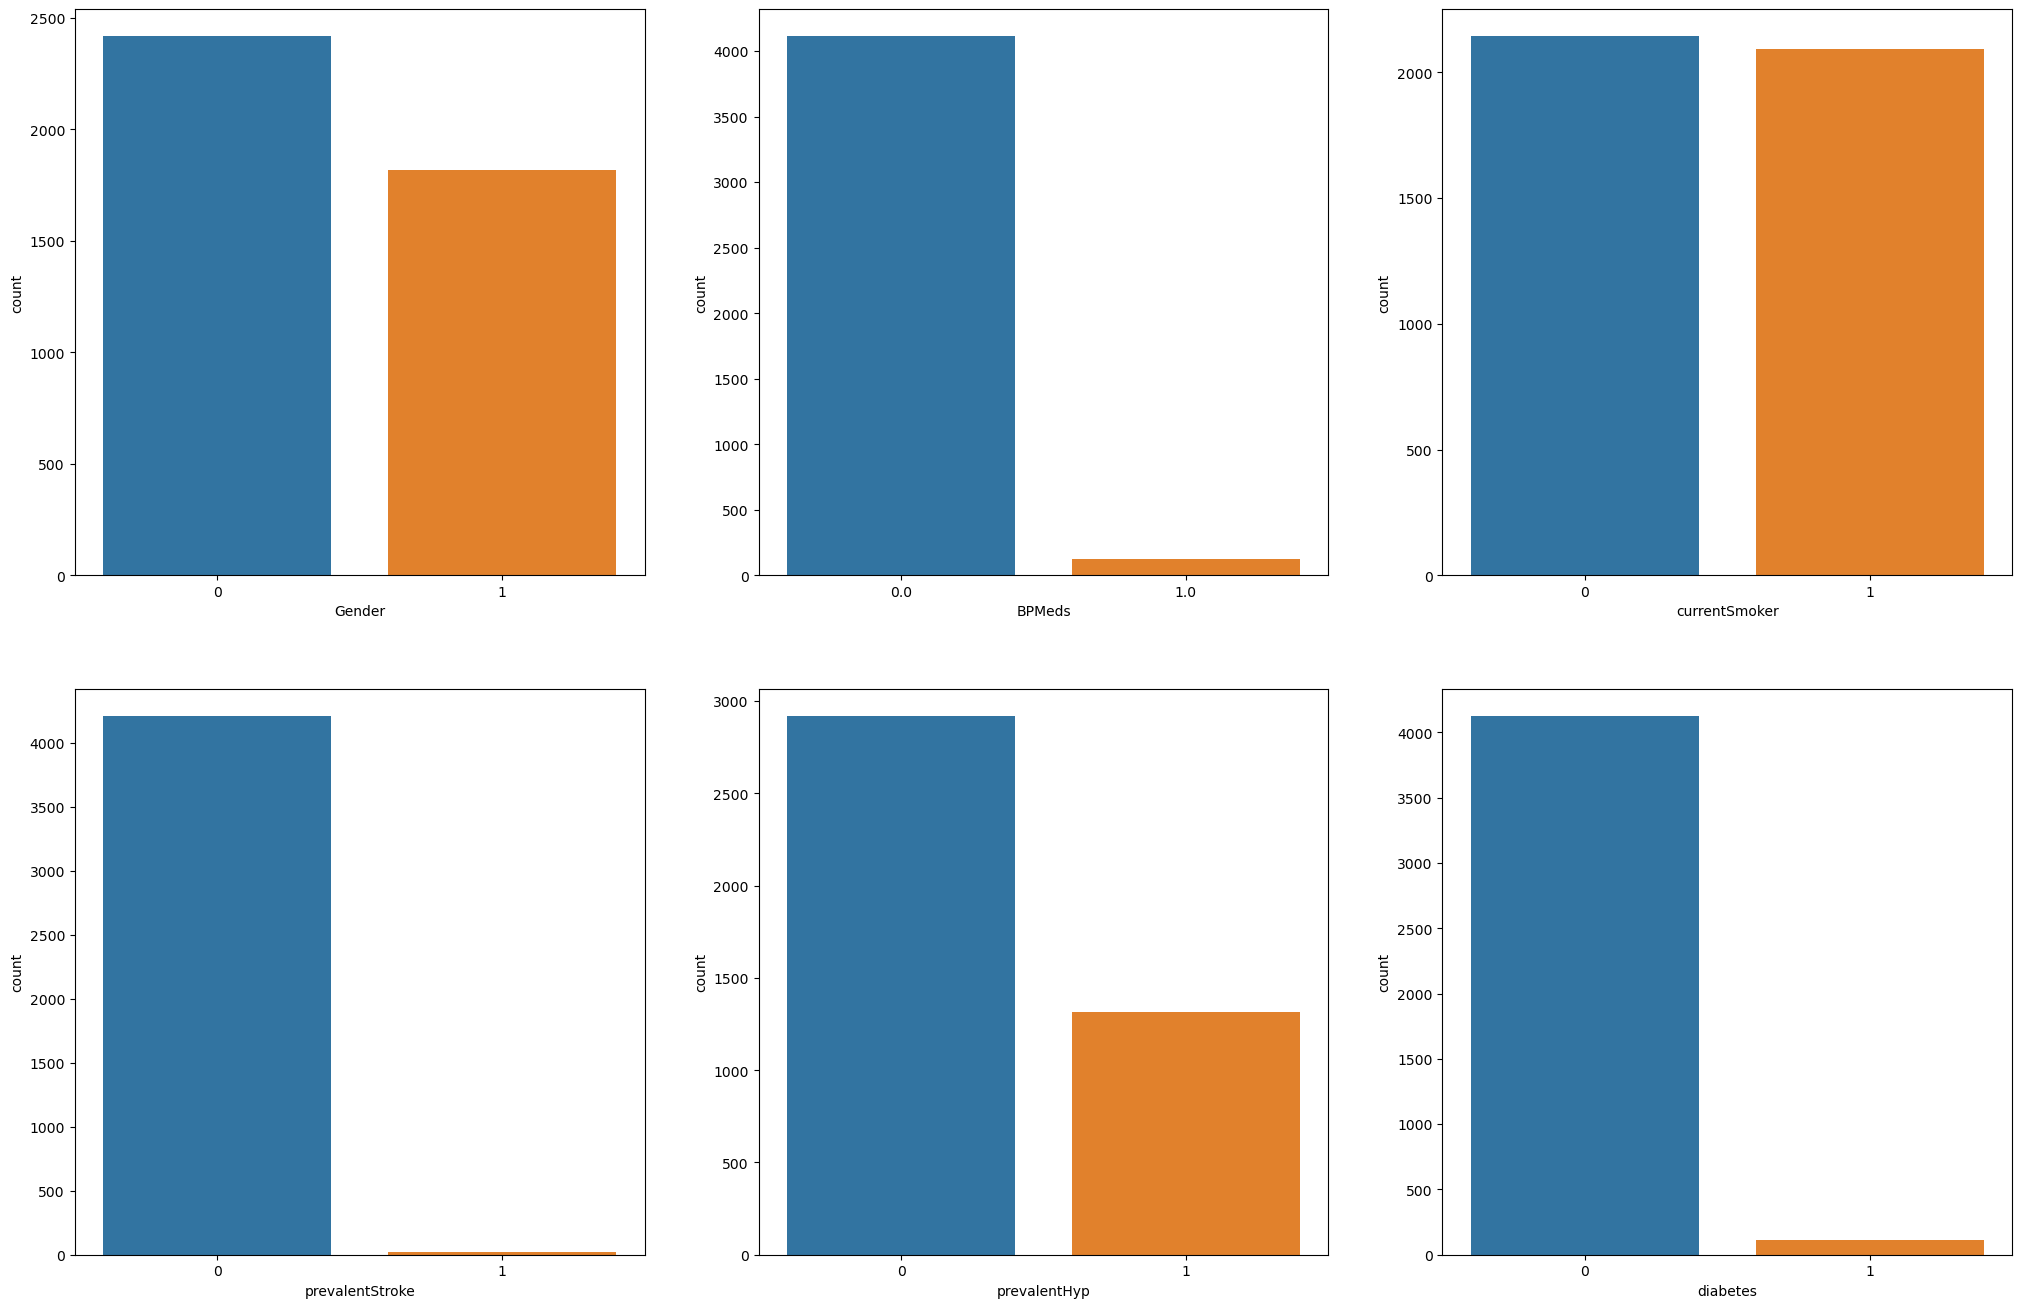

In [17]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df)

### Displaying distribution of the target variable 'TenYearCHD'

In [18]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [19]:
100*df['TenYearCHD'].value_counts()/len(df)

0    84.804153
1    15.195847
Name: TenYearCHD, dtype: float64

### Crosstabulation between 'TenYearCHD' and 'Gender'

In [20]:
pd.crosstab(df.TenYearCHD,df.Gender)

Gender,0,1
TenYearCHD,,
0,2118,1476
1,301,343


### Visualizing counts for categorical columns with respect to 'TenYearCHD'

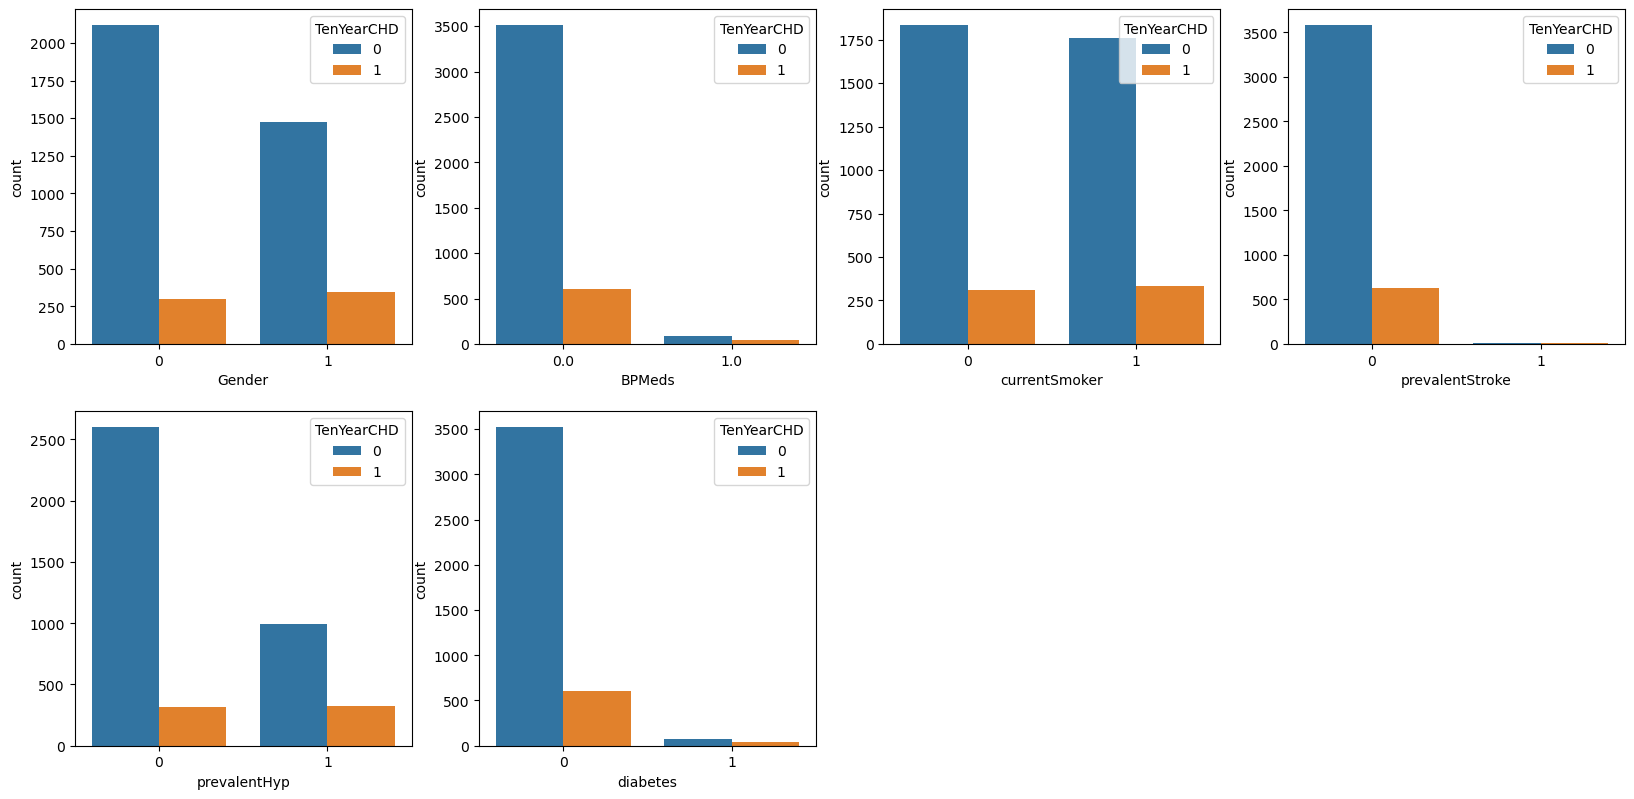

In [21]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 4, i + 1)
    sns.countplot(x=col, data=df, hue='TenYearCHD')

### Visualizing numerical columns using distplot

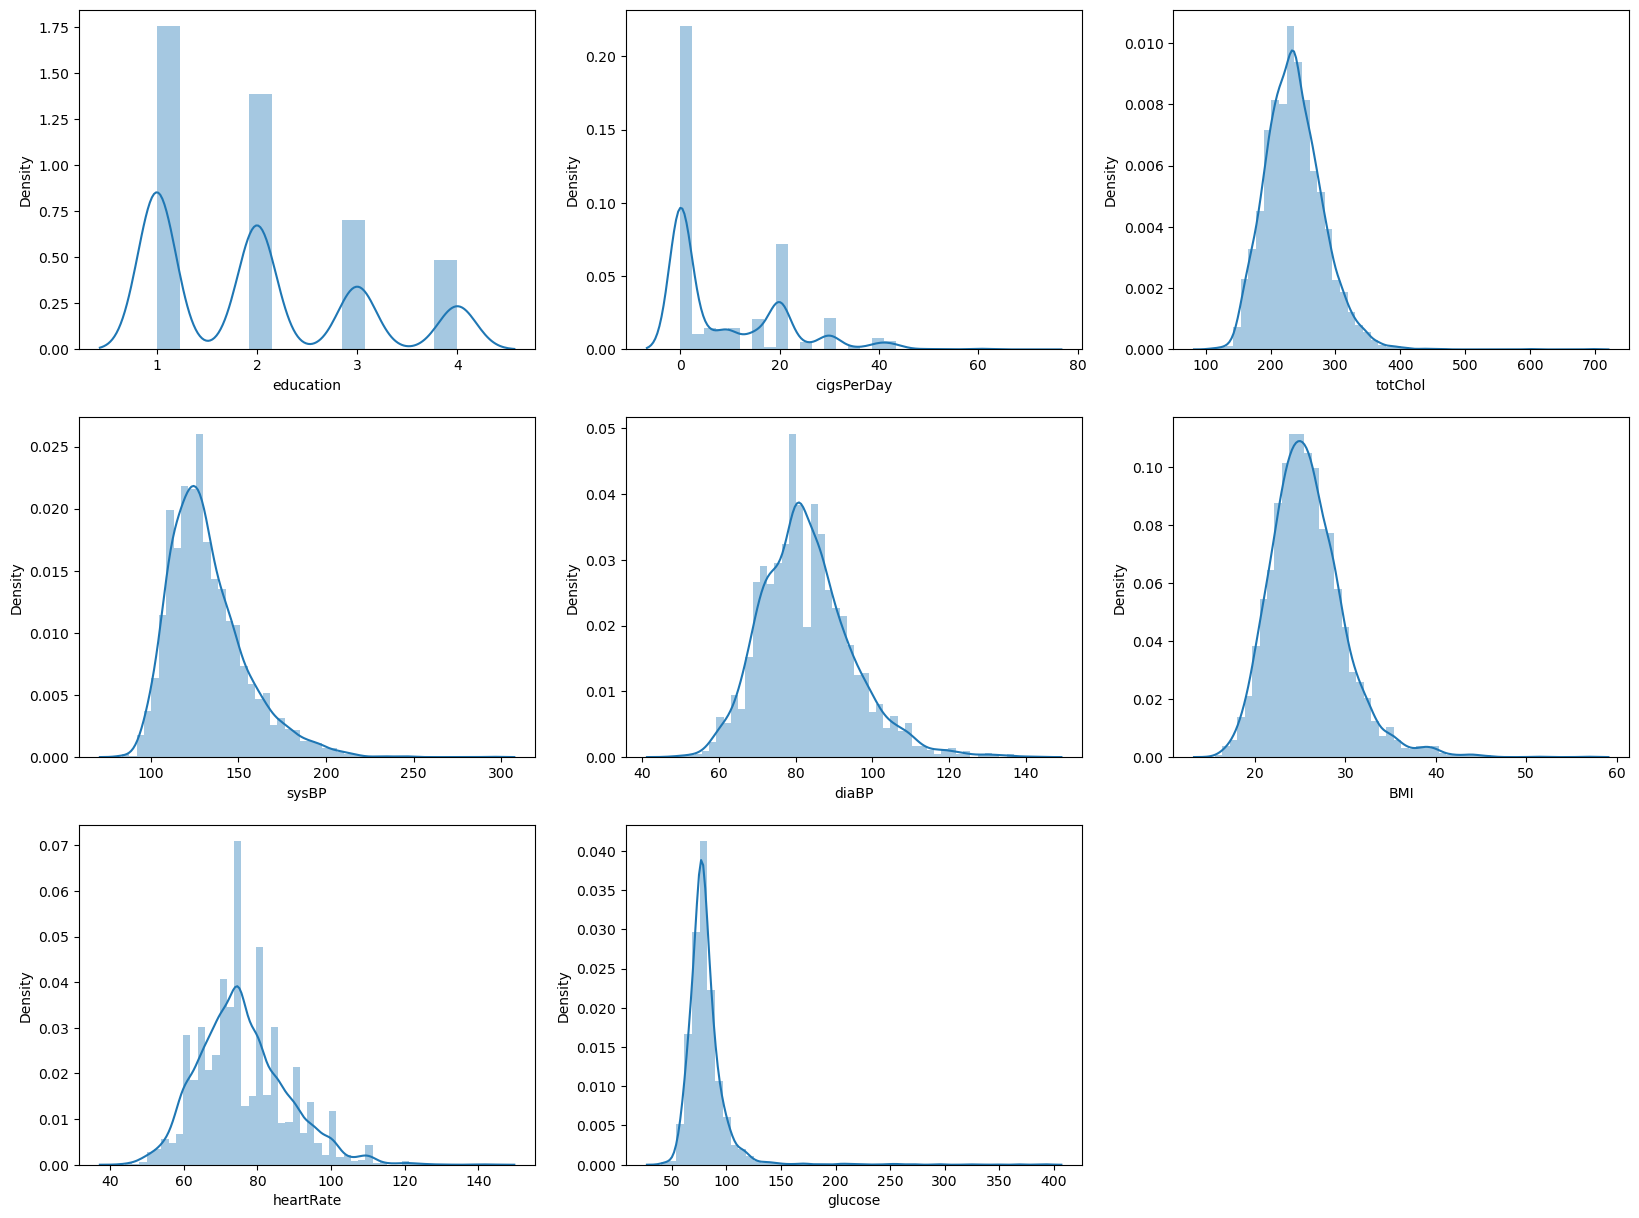

In [22]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.distplot(df[col])

### Visualization of 'sysBP' and 'diaBP' using a scatter plot

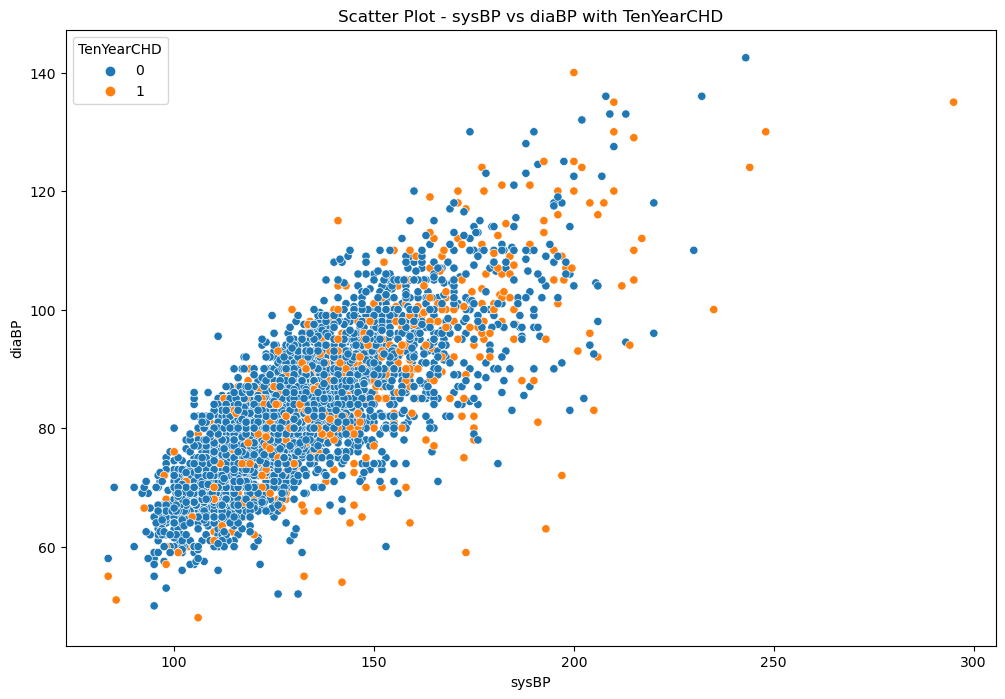

In [23]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sysBP', y='diaBP', hue='TenYearCHD', data=df)
plt.title('Scatter Plot - sysBP vs diaBP with TenYearCHD')
plt.show()

### Visualizing the relationship between 'age' and 'heartRate' with respect to 'TenYearCHD'

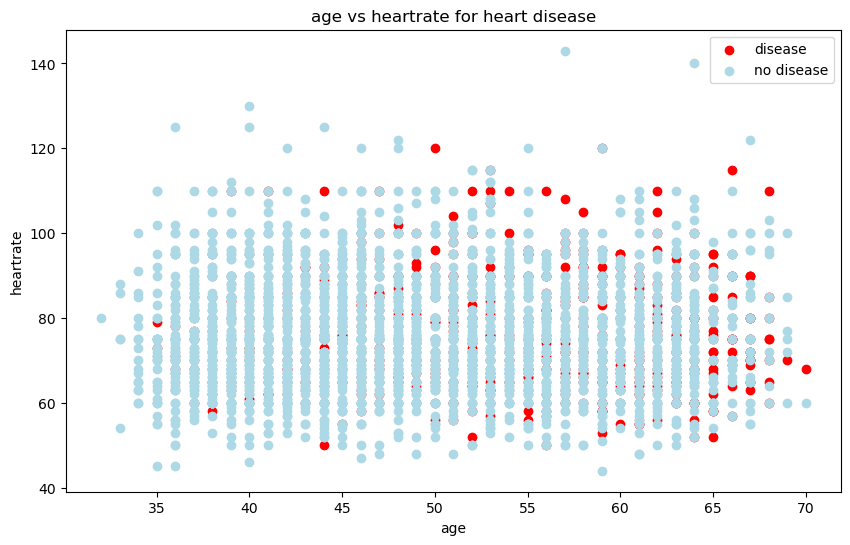

In [24]:
plt.figure(figsize=(10,6))
plt.title('age vs heartrate for heart disease')
plt.scatter(df.age[df.TenYearCHD==1],df.heartRate[df.TenYearCHD==1], c='red')
plt.scatter(df.age[df.TenYearCHD==0],df.heartRate[df.TenYearCHD==0], c='lightblue')
plt.xlabel('age')
plt.ylabel('heartrate')
plt.legend(['disease','no disease'])

### Violin plot for 'diaBP' with 'TenYearCHD' and 'Gender' as hue

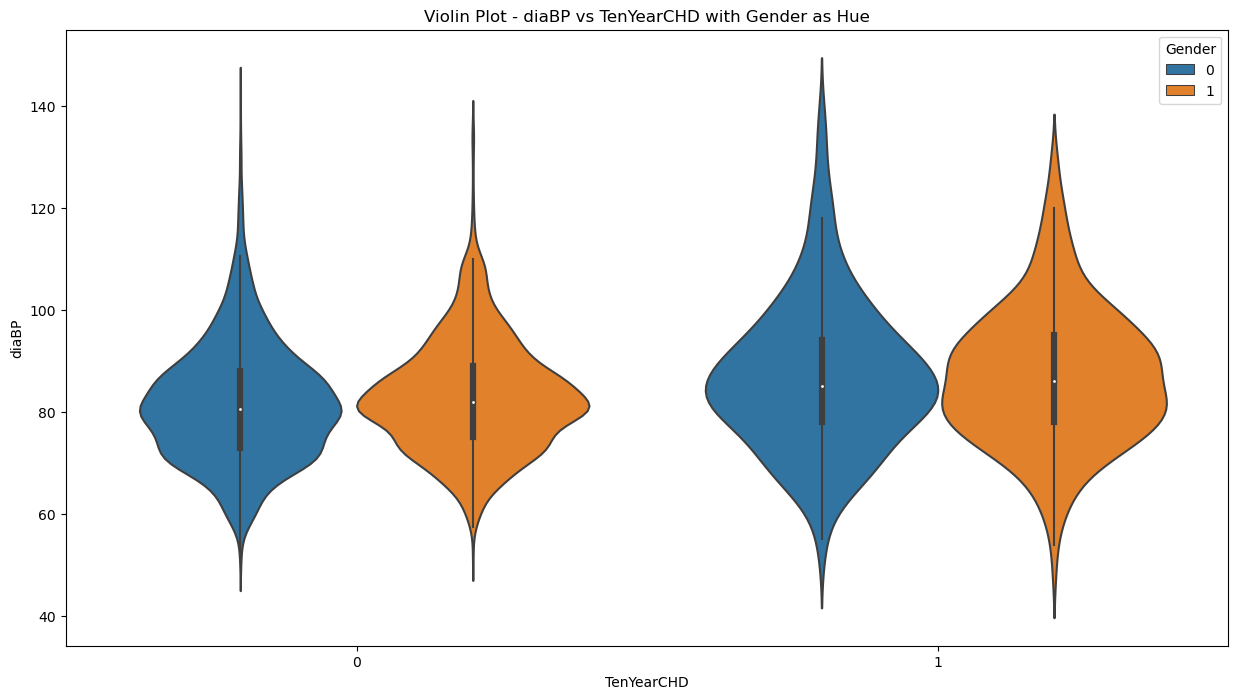

In [25]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='TenYearCHD', y='diaBP', hue='Gender', data=df)
plt.title('Violin Plot - diaBP vs TenYearCHD with Gender as Hue')
plt.show()

### Pie chart for the distribution of 'TenYearCHD'

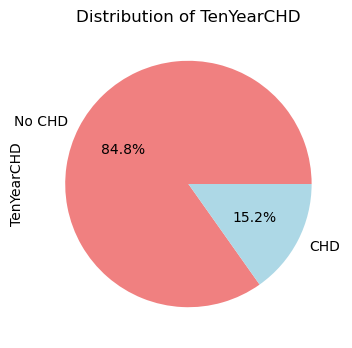

In [26]:
plt.figure(figsize=(4, 4))
df['TenYearCHD'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], labels=['No CHD', 'CHD'])
plt.title('Distribution of TenYearCHD')
plt.show()

### Heatmap for the correlation matrix of selected numerical columns

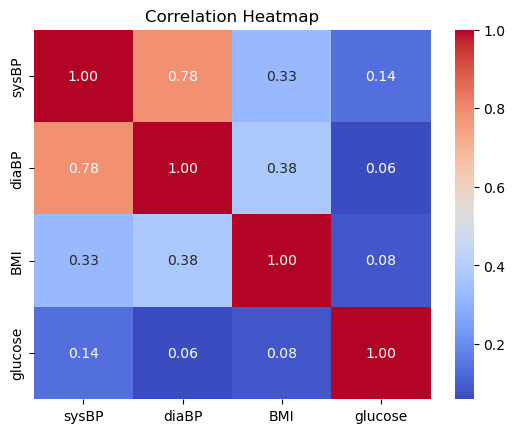

In [27]:
corr_matrix = df[['sysBP', 'diaBP', 'BMI', 'glucose']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Pairplot for selected numerical columns with 'TenYearCHD' as hue

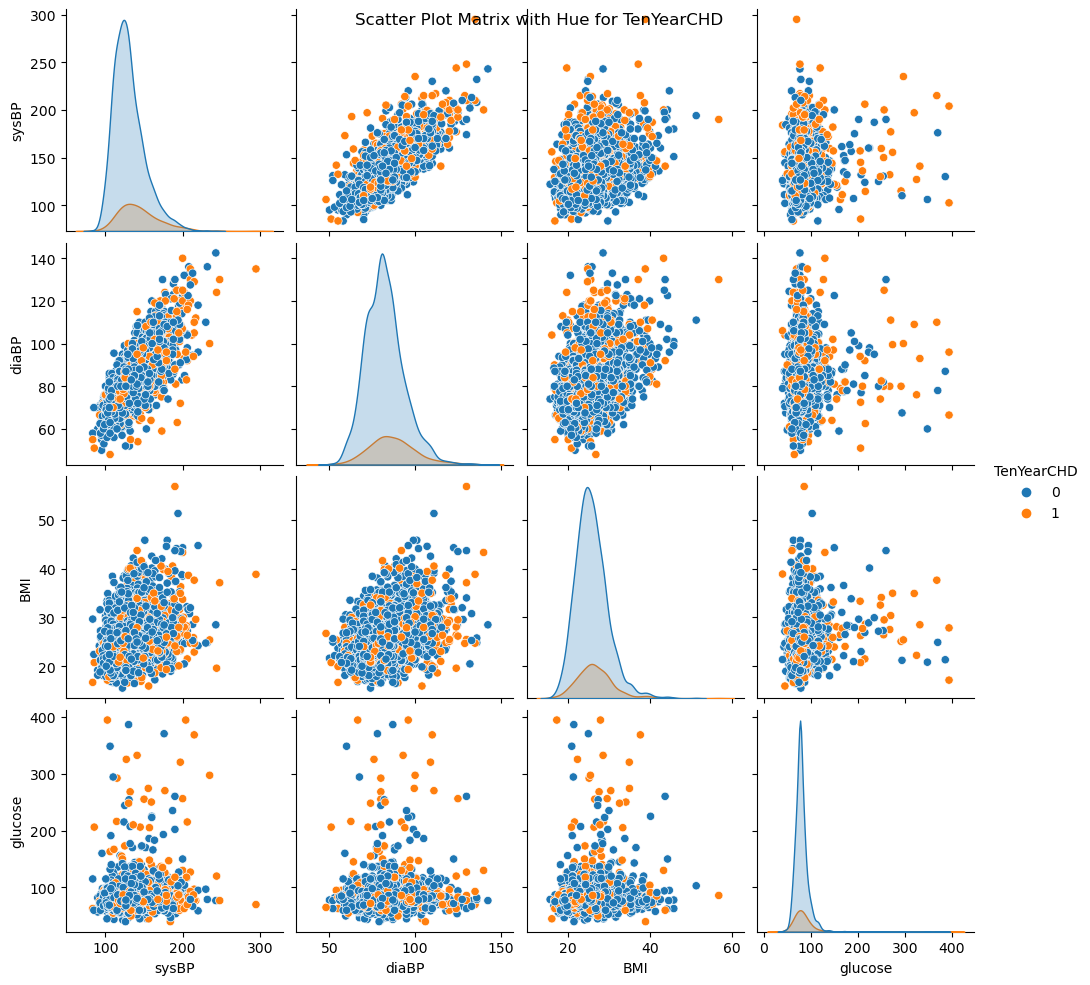

In [28]:
sns.pairplot(df[['sysBP', 'diaBP', 'BMI', 'glucose', 'TenYearCHD']], hue='TenYearCHD')
plt.suptitle('Scatter Plot Matrix with Hue for TenYearCHD')
plt.show()

### Heatmap for the entire correlation matrix

<AxesSubplot:>

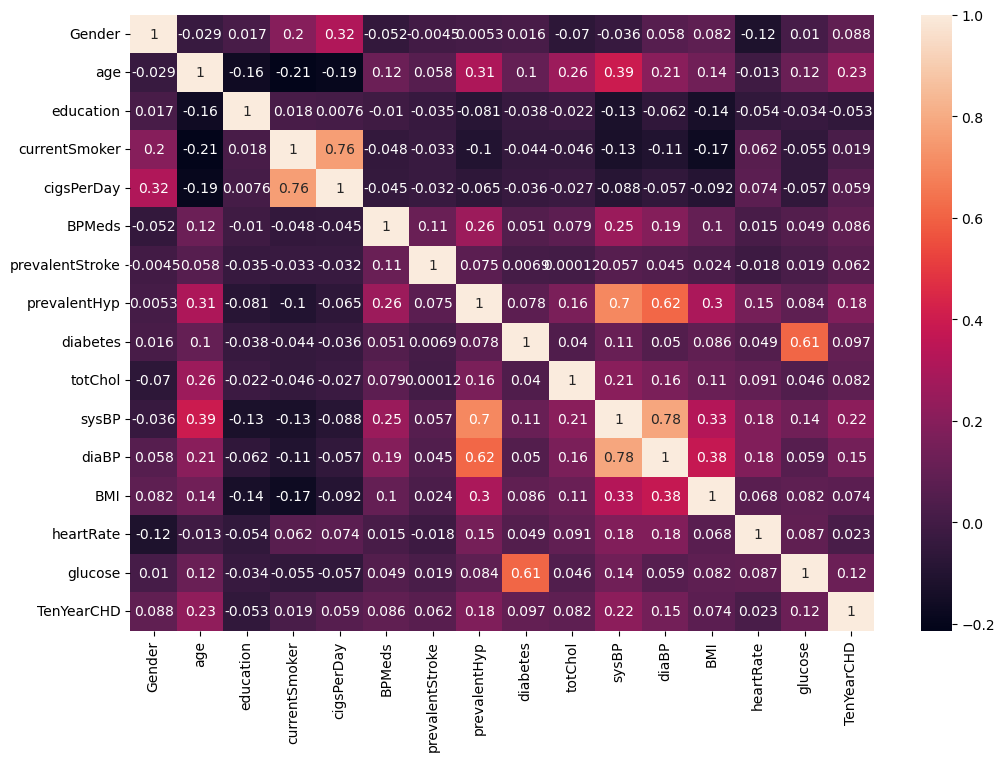

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)


## Identify strong positive and strong negative correlations

In [30]:
correlation_matrix = df.corr()
strong_positive_corr_threshold = 0.7
strong_negative_corr_threshold = -0.7

strong_positive_corr = correlation_matrix[correlation_matrix > strong_positive_corr_threshold]
strong_positive_corr = strong_positive_corr[strong_positive_corr < 1]
strong_positive_corr = strong_positive_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)


In [31]:
print("Strong positive Correlations:")
print(strong_positive_corr)

Strong positive Correlations:
               currentSmoker  cigsPerDay     sysBP     diaBP
currentSmoker            NaN    0.760239       NaN       NaN
cigsPerDay          0.760239         NaN       NaN       NaN
sysBP                    NaN         NaN       NaN  0.784002
diaBP                    NaN         NaN  0.784002       NaN


In [32]:
strong_negative_corr = correlation_matrix[correlation_matrix < strong_negative_corr_threshold]
strong_negative_corr = strong_negative_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)

In [33]:
print("Strong Negative Correlations:")
print(strong_negative_corr)

Strong Negative Correlations:
Empty DataFrame
Columns: []
Index: []


###  Visualize strong positive correlations

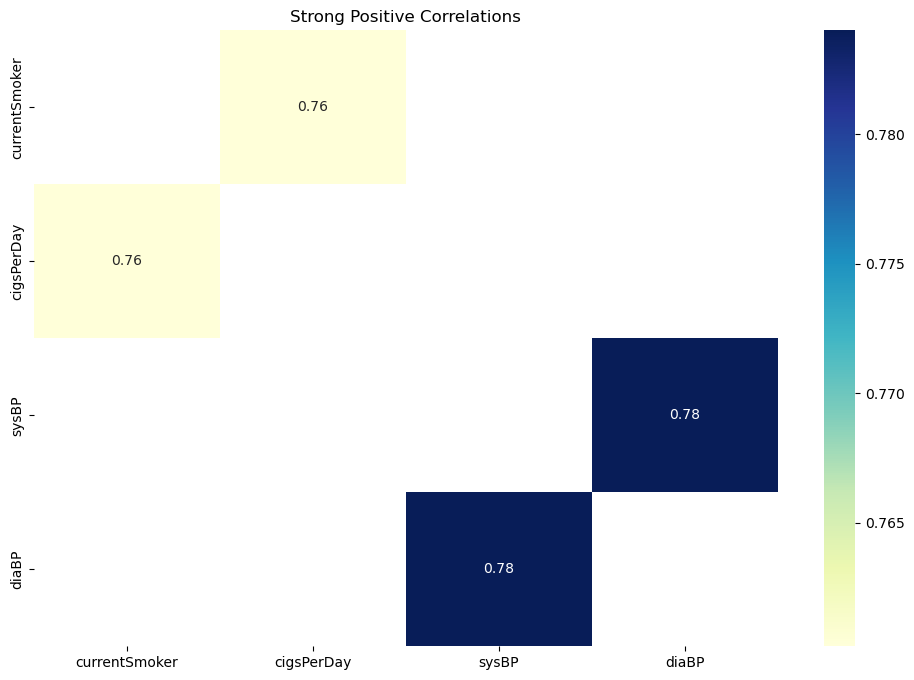

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(strong_positive_corr, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Strong Positive Correlations')
plt.show()


### Scatter plot with 'sysBP', 'diaBP', and 'age' as bubble sizes

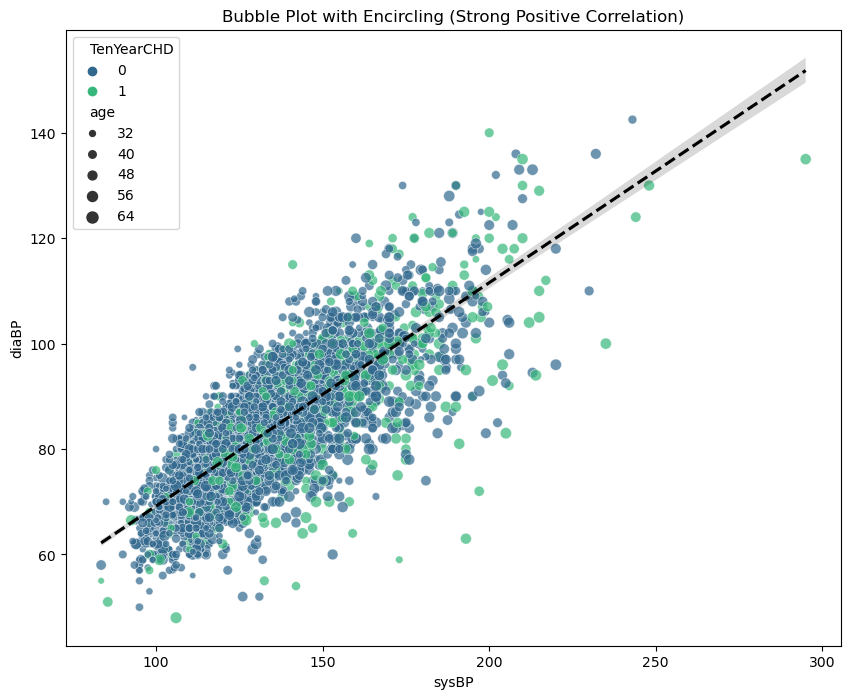

In [35]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='sysBP', y='diaBP', size='age', data=df, hue='TenYearCHD', palette='viridis', alpha=0.7)
sns.regplot(x='sysBP', y='diaBP', data=df, scatter=False, color='black', line_kws={'linestyle':'--'})
plt.title('Bubble Plot with Encircling (Strong Positive Correlation)')
plt.show()

### Count plot for 'TenYearCHD' with 'prevalentHyp' as hue

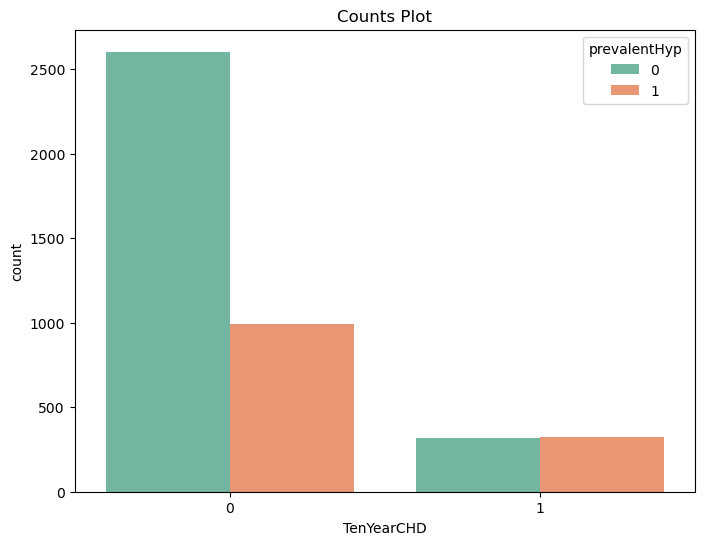

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TenYearCHD', hue='prevalentHyp', data=df, palette='Set2')
plt.title('Counts Plot')
plt.show()


### Joint histogram for 'age' and 'sysBP' with respect to 'TenYearCHD'

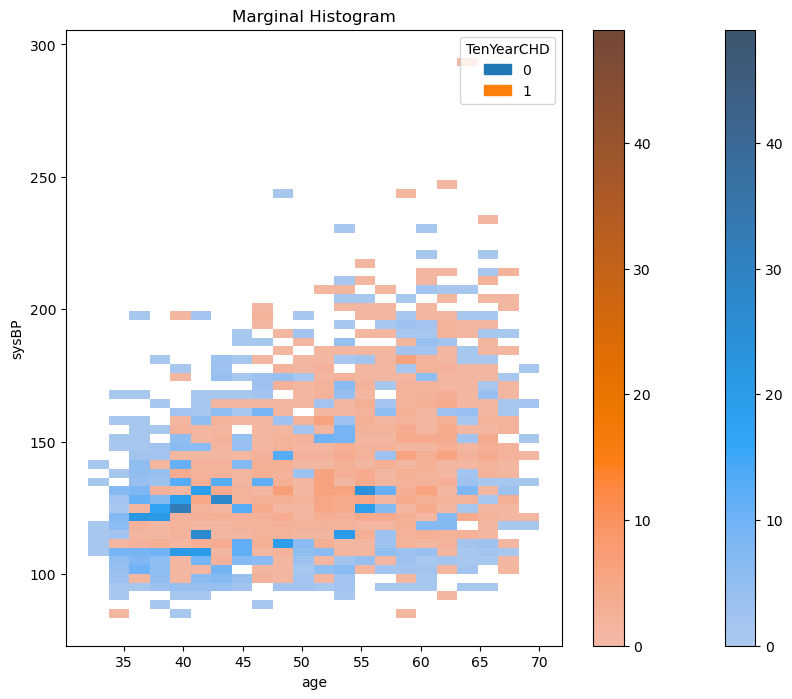

In [37]:
plt.figure(figsize=(10, 8))
sns.histplot(df, x='age', y='sysBP', hue='TenYearCHD', cbar=True, kde=True)
plt.title('Marginal Histogram')
plt.show()

### Boxplot for 'sysBP' and 'age' with respect to 'TenYearCHD' and 'prevalentHyp'

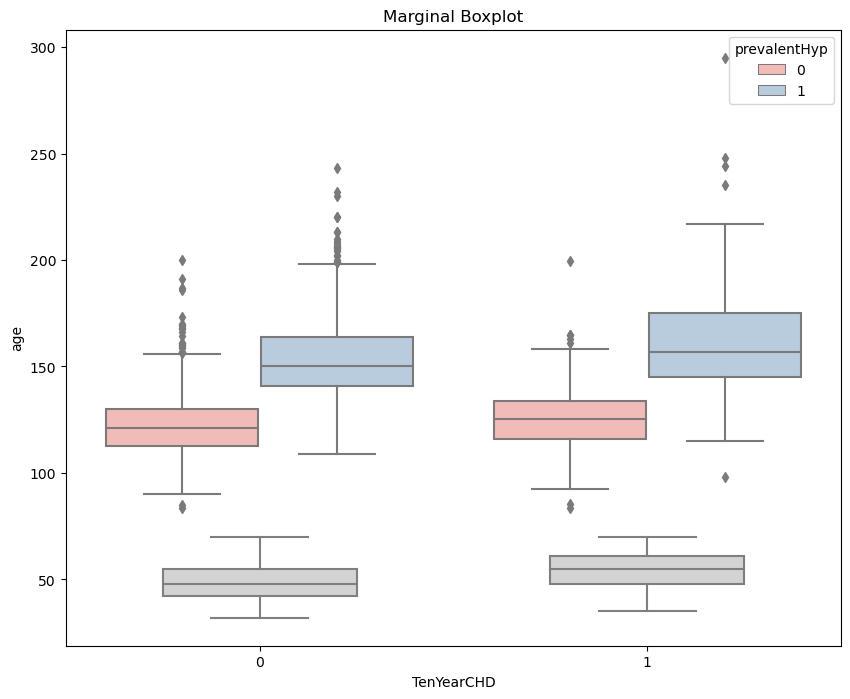

In [38]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='TenYearCHD', y='sysBP', data=df, hue='prevalentHyp', palette='Pastel1')
sns.boxplot(x='TenYearCHD', y='age', data=df, color='lightgray', width=0.5)
plt.title('Marginal Boxplot')
plt.show()

### Line plot for 'age' and 'glucose' with respect to 'TenYearCHD'

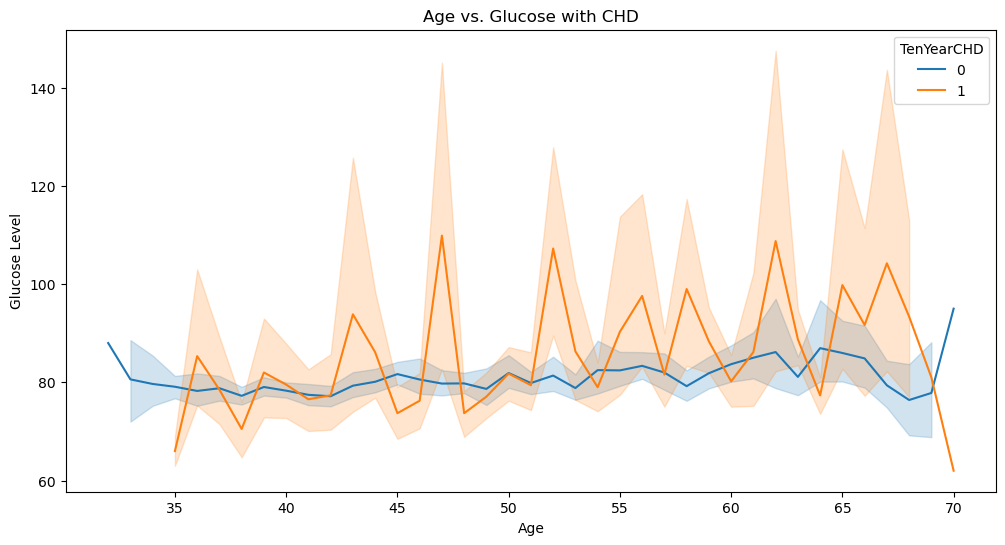

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='glucose', data=df, hue='TenYearCHD')
plt.title('Age vs. Glucose with CHD')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.show()

### Line plot for 'age' and 'sysBP'

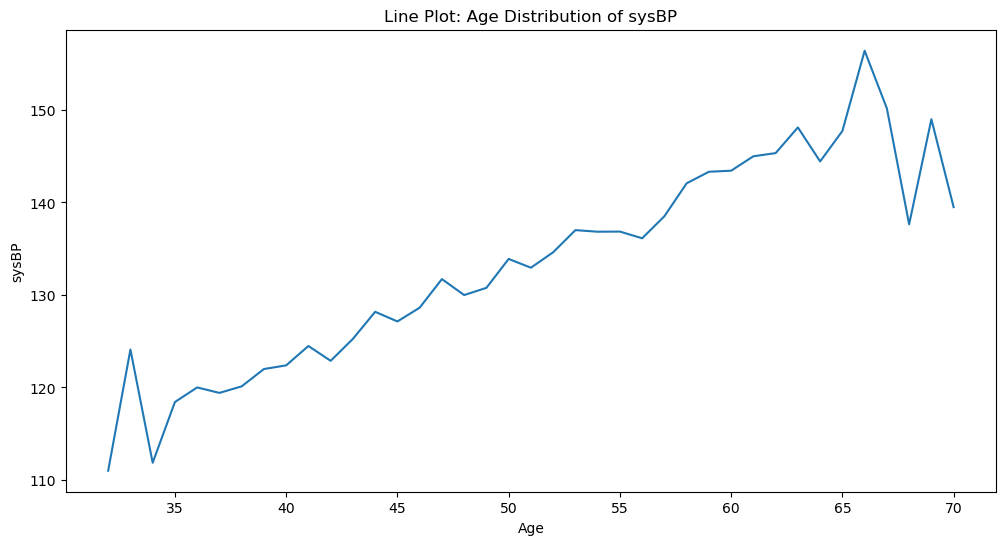

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='sysBP', data=df, ci=None)
plt.title('Line Plot: Age Distribution of sysBP')
plt.xlabel('Age')
plt.ylabel('sysBP')
plt.show()

### Scatter plot for 'sysBP' and 'diaBP' with respect to 'TenYearCHD'

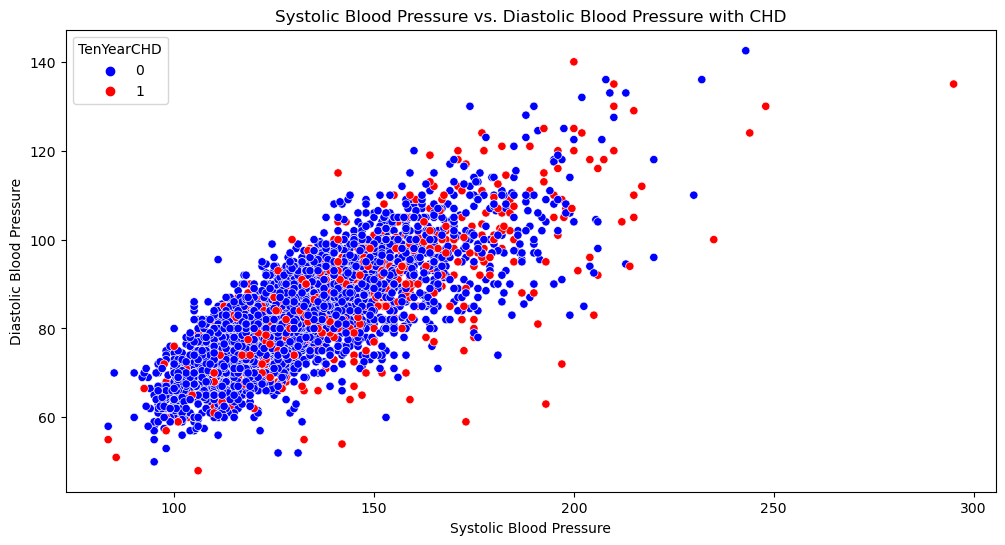

In [41]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sysBP', y='diaBP', data=df, hue='TenYearCHD', palette={0: 'blue', 1: 'red'})
plt.title('Systolic Blood Pressure vs. Diastolic Blood Pressure with CHD')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.show()

### Jointplot for 'sysBP' and 'heartRate' with respect to 'TenYearCHD'

<Figure size 1200x600 with 0 Axes>

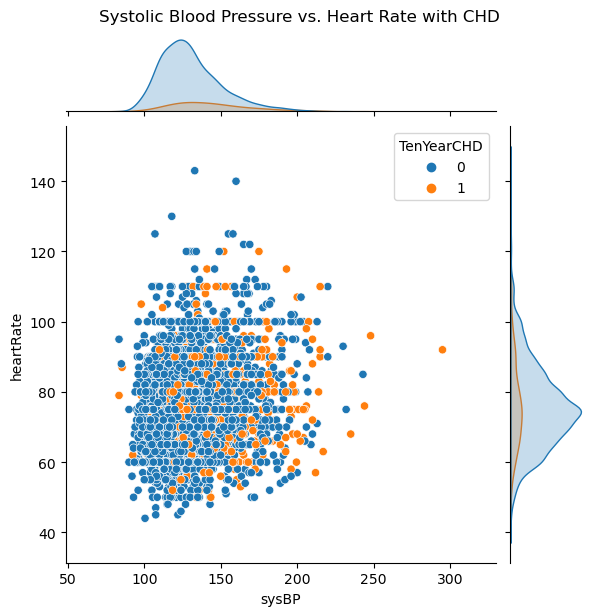

In [42]:
plt.figure(figsize=(12, 6))
sns.jointplot(x='sysBP', y='heartRate', data=df, hue='TenYearCHD')
plt.suptitle('Systolic Blood Pressure vs. Heart Rate with CHD', y=1.02)
plt.show()

### Plot count distribution of 'TenYearCHD' and 'education' 

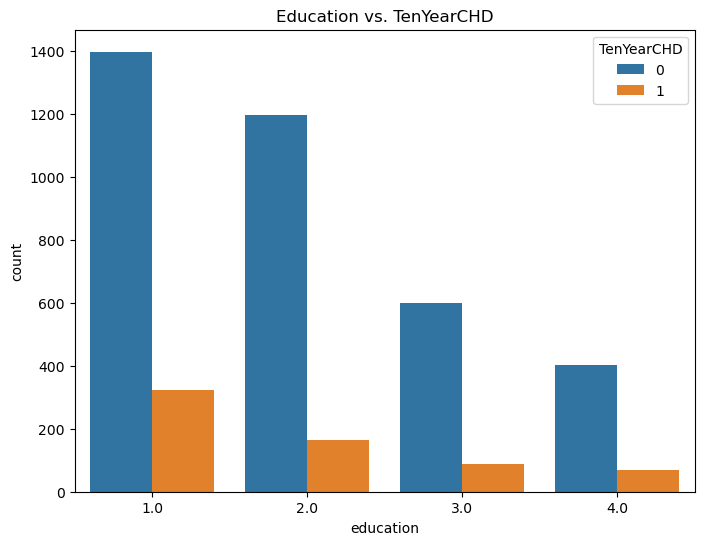

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='TenYearCHD', data=df)
plt.title('Education vs. TenYearCHD')
plt.show()

### Checking and Handling Outliers 

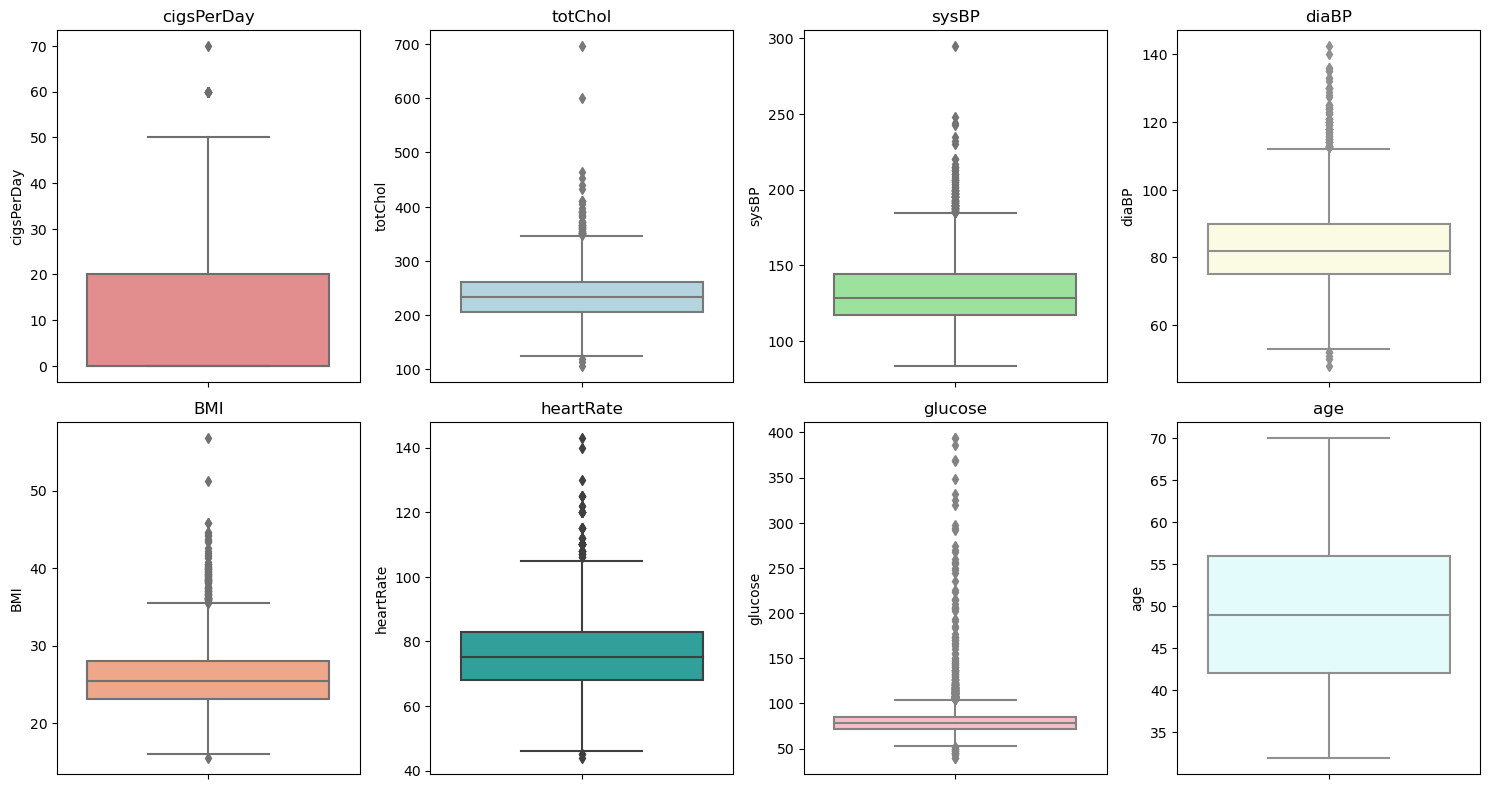

In [44]:

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
variables = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'age']
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightcyan']
for i, variable in enumerate(variables):
    row = i // 4
    col = i % 4
    sns.boxplot(y=df[variable], ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(variable)
plt.tight_layout()
plt.show()

In [45]:
# IQR
Q1 = np.percentile(df['totChol'], 25)
Q3 = np.percentile(df['totChol'], 75)
IQR = Q3 - Q1
print(IQR)

56.0


In [46]:
upper_Bound=Q3+1.5*IQR
print(upper_Bound)
lower_Bound=Q1-1.5*IQR
print(lower_Bound)


346.0
122.0


In [47]:
df['totChol']=np.where(df['totChol']>346.0,346.0,df['totChol'])
df['totChol']=np.where(df['totChol']<122.0,122.0,df['totChol'])

In [48]:
# IQR
Q1 = np.percentile(df['sysBP'], 25)
Q3 = np.percentile(df['sysBP'], 75)
IQR = Q3 - Q1
print(IQR)

27.0


In [49]:
upper_Bound=Q3+1.5*IQR
print(upper_Bound)

184.5


In [50]:
df['sysBP']=np.where(df['sysBP']>184.5,184.5,df['sysBP'])

In [51]:
# IQR
Q1 = np.percentile(df['diaBP'], 25)
Q3 = np.percentile(df['diaBP'], 75)
IQR = Q3 - Q1
print(IQR)

14.875


In [52]:
upper_Bound=Q3+1.5*IQR
print(upper_Bound)
lower_Bound=Q1-1.5*IQR
print(lower_Bound)


112.1875
52.6875


In [53]:
df['diaBP']=np.where(df['diaBP']>112.1875,112.1875,df['diaBP'])
df['diaBP']=np.where(df['diaBP']<52.6875,52.6875,df['diaBP'])

In [54]:
# IQR
Q1 = np.percentile(df['BMI'], 25)
Q3 = np.percentile(df['BMI'], 75)
IQR = Q3 - Q1
print(IQR)

4.957500000000003


In [55]:
upper_Bound=Q3+1.5*IQR
print(upper_Bound)

35.47375000000001


In [56]:
df['BMI']=np.where(df['BMI']>35.5,35.5,df['BMI'])

In [57]:
# IQR
Q1 = np.percentile(df['heartRate'], 25)
Q3 = np.percentile(df['heartRate'], 75)
IQR = Q3 - Q1
print(IQR)

15.0


In [58]:
upper_Bound=Q3+1.5*IQR
print(upper_Bound)

105.5


In [59]:
df['heartRate']=np.where(df['heartRate']>105.5,105.5,df['heartRate'])

In [60]:
Q1 = np.percentile(df['glucose'], 25)
Q3 = np.percentile(df['glucose'], 75)
IQR = Q3 - Q1
print(IQR)

13.0


In [61]:
upper_Bound=Q3+1.5*IQR
print(upper_Bound)
lower_Bound=Q1-1.5*IQR
print(lower_Bound)

104.5
52.5


In [62]:
df['glucose']=np.where(df['glucose']>104.5,104.5,df['glucose'])
df['glucose']=np.where(df['glucose']<52.5,52.5,df['glucose'])

# Model Building

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [64]:
np.random.seed(42)

In [65]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [66]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy='minority')
x_new,y_new=oversample.fit_resample(X,y)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

In [69]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('Training Score:',100*model.score(X_train,y_train))
print('Testing Score :',100*model.score(X_test,y_test))
print(f'Logistic Regression Accuracy: {accuracy:2f}')

Training Score: 64.27826086956522
Testing Score : 62.03059805285118
Logistic Regression Accuracy: 0.620306


In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63       752
           1       0.60      0.64      0.61       686

    accuracy                           0.62      1438
   macro avg       0.62      0.62      0.62      1438
weighted avg       0.62      0.62      0.62      1438



In [71]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print('Training Score:',100*dt_model.score(X_train,y_train))
print('Testing Score :',100*dt_model.score(X_test,y_test))
print(f'Decision Tree Accuracy: {dt_accuracy:2f}')

Training Score: 100.0
Testing Score : 90.47287899860918
Decision Tree Accuracy: 0.904729


In [72]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       752
           1       0.84      1.00      0.91       686

    accuracy                           0.90      1438
   macro avg       0.92      0.91      0.90      1438
weighted avg       0.92      0.90      0.90      1438



In [73]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print('Training Score:',100*rf_model.score(X_train,y_train))
print('Testing Score :',100*rf_model.score(X_test,y_test))
print(f'Random Forest Accuracy: {rf_accuracy:2f}')

Training Score: 100.0
Testing Score : 97.91376912378304
Random Forest Accuracy: 0.979138


In [74]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       752
           1       0.96      1.00      0.98       686

    accuracy                           0.98      1438
   macro avg       0.98      0.98      0.98      1438
weighted avg       0.98      0.98      0.98      1438



In [75]:
# Train Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print('Training Score:',100*svm_model.score(X_train,y_train))
print('Testing Score :',100*svm_model.score(X_test,y_test))
print(f'SVM Accuracy: {svm_accuracy:2f}')

Training Score: 66.12173913043479
Testing Score : 65.99443671766342
SVM Accuracy: 0.659944


In [76]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67       752
           1       0.64      0.67      0.65       686

    accuracy                           0.66      1438
   macro avg       0.66      0.66      0.66      1438
weighted avg       0.66      0.66      0.66      1438



In [77]:
# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print('Training Score:',100*gb_model.score(X_train,y_train))
print('Testing Score :',100*gb_model.score(X_test,y_test))
print(f'Gradient Boosting Accuracy: {gb_accuracy:2f}')

Training Score: 76.33043478260869
Testing Score : 72.94853963838665
Gradient Boosting Accuracy: 0.729485


In [78]:
print(classification_report(y_test, gb_predictions))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       752
           1       0.70      0.77      0.73       686

    accuracy                           0.73      1438
   macro avg       0.73      0.73      0.73      1438
weighted avg       0.73      0.73      0.73      1438



In [79]:
from sklearn.neighbors import KNeighborsClassifier
kn_model= KNeighborsClassifier(n_neighbors=7, metric="minkowski",p=2)
kn_model.fit(X_train, y_train)
kn_predictions = kn_model.predict(X_test)
kn_accuracy = accuracy_score(y_test, kn_predictions)
print('Training Score:',100*kn_model.score(X_train,y_train))
print('Testing Score :',100*kn_model.score(X_test,y_test))
print(f'knn Accuracy: {kn_accuracy:2f}')

Training Score: 81.91304347826087
Testing Score : 74.54798331015299
knn Accuracy: 0.745480


In [80]:
print(classification_report(y_test, kn_predictions))

              precision    recall  f1-score   support

           0       0.85      0.62      0.72       752
           1       0.68      0.88      0.77       686

    accuracy                           0.75      1438
   macro avg       0.77      0.75      0.74      1438
weighted avg       0.77      0.75      0.74      1438



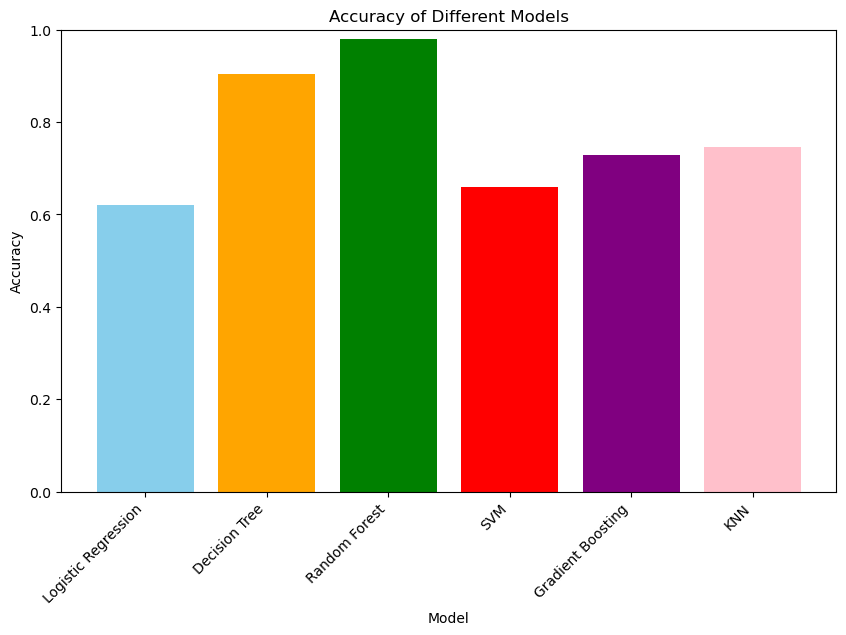

In [81]:
models = {
    "Logistic Regression": accuracy,
    "Decision Tree": dt_accuracy,
    "Random Forest": rf_accuracy,
    "SVM": svm_accuracy,
    "Gradient Boosting":gb_accuracy,
    "KNN": kn_accuracy
}
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink']
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), models.values(), color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()

In [86]:
from sklearn.model_selection import cross_val_score
rf_cv_scores = cross_val_score(rf_model, x_new, y_new, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", rf_cv_scores)
print("Mean CV Accuracy:", np.mean(rf_cv_scores))

Cross-Validation Scores: [0.972879   0.97844228 0.97635605 0.98329854 0.97146834]
Mean CV Accuracy: 0.9764888410118825


In [83]:
dt_cv_scores = cross_val_score(dt_model, x_new, y_new, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", dt_cv_scores)
print("Mean CV Accuracy:", np.mean(dt_cv_scores))

Cross-Validation Scores: [0.90890125 0.90681502 0.90890125 0.91997216 0.9039666 ]
Mean CV Accuracy: 0.9097112571295283
